In [1]:
import pandas as pd
data = pd.read_csv("./Points.csv",header=None, names=['x','y'])

In [2]:
# show the number of records
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       90 non-null     int64
 1   y       90 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB


In [3]:
data.head()

,x,y
0,105,34
1,0,129
2,26,133
3,0,106
4,9,113


In [4]:
# describe the dataset information
data.describe()

,x,y
count,90.000000,90.000000
mean,66.366667,67.866667
std,43.193958,42.501870
min,0.000000,0.000000
25%,32.250000,31.250000
50%,58.500000,60.500000
75%,109.750000,112.000000
max,137.000000,139.000000


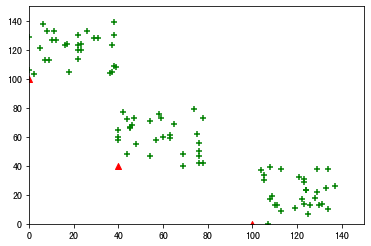

In [5]:
import numpy as np
import matplotlib.pyplot as plt

real_center = [(40,40),(100,0),(0,100)]
point_number = 90

points_x = data['x']
points_y = data['y']

# draw the scatter plot for dataset records by using '+'
plt.scatter(points_x, points_y, color='green', marker='+')
# draw the initial center by using triangle
center_x, center_y = zip(*real_center)
plt.scatter(center_x, center_y, color='red', marker='^')
plt.xlim(0, 150)
plt.ylim(0, 150)
plt.show()


In [6]:
# Do some parameter settings: Set 3 center points, Store the records into p_list...
K         = 3
p_list    = np.stack([points_x, points_y], axis=1)
index     = np.random.choice(len(p_list), size=K)
centeroid = p_list[index]

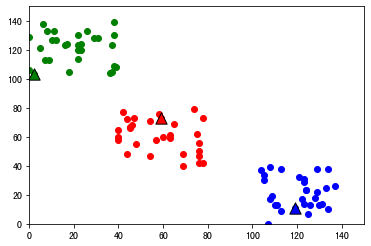

In [7]:
# Iterator all points and put them into the nearest centeroid points
points_set = {key: [] for key in range(K)}

for p in p_list:
    nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)
    points_set[nearest_index].append(p)

# Draw the scatter plot. Set the different colors(red,green,blue) for three different centeroid points
for k_index, p_set in points_set.items():
    p_xs = [p[0] for p in p_set]
    p_ys = [p[1] for p in p_set]
    if k_index == 0:
        plt.scatter(p_xs, p_ys, color='red')
    if k_index == 1:
        plt.scatter(p_xs, p_ys, color='green')
    if k_index == 2:
        plt.scatter(p_xs, p_ys, color='blue')

for ix, p in enumerate(centeroid):
    if ix == 0:
        plt.scatter(p[0], p[1], color='red', marker='^', edgecolor='black', s=128)
    if ix == 1:
        plt.scatter(p[0], p[1], color='green', marker='^', edgecolor='black', s=128)
    if ix == 2:
        plt.scatter(p[0], p[1], color='blue', marker='^', edgecolor='black', s=128)

plt.xlim(0, 150)
plt.ylim(0, 150)
plt.show()

In [8]:
# Iterator three point set and calculate the new centeriod points
for k_index, p_set in points_set.items():
    p_xs = [p[0] for p in p_set]
    p_ys = [p[1] for p in p_set]
    centeroid[k_index, 0] = sum(p_xs) / len(p_set)
    centeroid[k_index, 1] = sum(p_ys) / len(p_set)

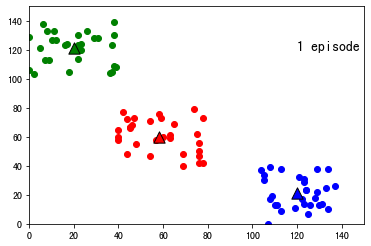

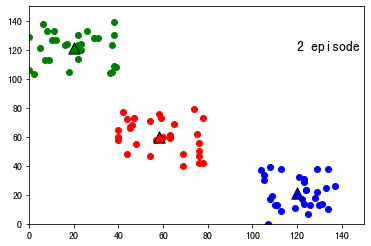

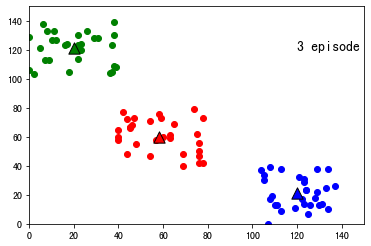

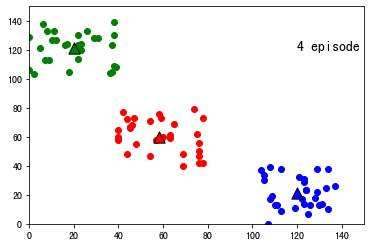

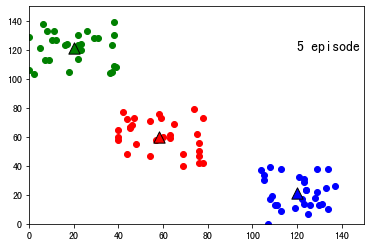

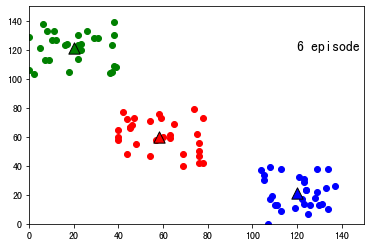

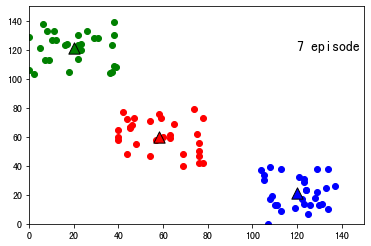

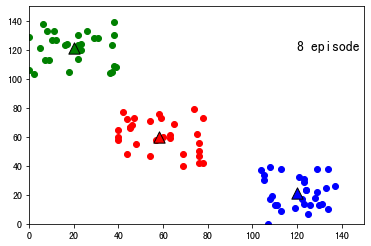

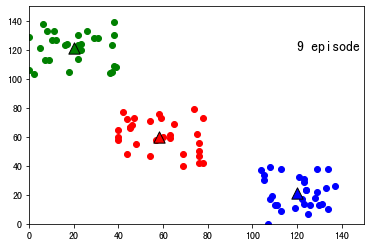

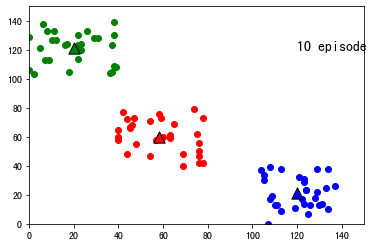

In [9]:
# Use the for loop to do 10 episode training, the process is very similar with above, 
# then we can find that the clustering results become more and more stable according to the scatter plot.

for i in range(10):
    points_set = {key: [] for key in range(K)}

    for p in p_list:
        nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)
        points_set[nearest_index].append(p)
        
    for k_index, p_set in points_set.items():
        p_xs = [p[0] for p in p_set]
        p_ys = [p[1] for p in p_set]
        centeroid[k_index, 0] = sum(p_xs) / len(p_set)
        centeroid[k_index, 1] = sum(p_ys) / len(p_set)
        
    for k_index, p_set in points_set.items():
        p_xs = [p[0] for p in p_set]
        p_ys = [p[1] for p in p_set]
        if k_index == 0:
            plt.scatter(p_xs, p_ys, color='red')
        if k_index == 1:
            plt.scatter(p_xs, p_ys, color='green')
        if k_index == 2:
            plt.scatter(p_xs, p_ys, color='blue')

    for ix, p in enumerate(centeroid):
        if ix == 0:
            plt.scatter(p[0], p[1], color='red', marker='^', edgecolor='black', s=128)
        if ix == 1:
            plt.scatter(p[0], p[1], color='green', marker='^', edgecolor='black', s=128)
        if ix == 2:
            plt.scatter(p[0], p[1], color='blue', marker='^', edgecolor='black', s=128)
        
    
    plt.xlim(0, 150)
    plt.ylim(0, 150)
    plt.annotate('{} episode'.format(i + 1), xy=(120, 120), fontsize=14)
    plt.show()

In [10]:
# After 10 episode, we can get there new centeriod points, which are shown below.
print(centeroid)

[[ 58  60]
 [ 20 121]
 [120  21]]
